# ***Problem Statement and Analysing basic metrics***

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

df = pd.read_csv("netflix.csv")
df.head()

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 57.8MB/s]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#***Observations*** 

In [88]:
df.shape

(8807, 12)

In [89]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [90]:
np.sum(df.isnull() , axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

From the above information , the dataframe has 0 to 8806 rows and 12 columns. Except release_year column, all the other columns are of type "0bject". There are some missing values in director, cast, country, date_added, release_year, rating, duration columns. 
The column release_year of data-type "int" tells us about the first movie being released in 1925 and latest movie in the year 2021 .

###**Dropping of NaN Values in columns**

In [91]:
df1 = df.dropna(subset = ["rating","duration"])
df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [92]:
#extracting the indices which hav null values in country, cast, director columns
null_df = df1[['country','cast','director']].isna()
null_df = null_df[ (null_df['country']==True) & (null_df['cast']==True) & (null_df['director']==True) ]
index_to_drop = null_df.index
index_to_drop

Int64Index([   3,   10,   14,   74,  123,  147,  181,  218,  224,  234,  242,
             320,  368,  369,  379,  404,  430,  465,  466,  490,  497,  549,
             641,  653,  710,  738,  761,  842,  851,  852,  854,  925,  936,
             957, 1005, 1038, 1056, 1094, 1095, 1116, 1224, 1225, 1723, 1828,
            1889, 1890, 1952, 2101, 2152, 2222, 2236, 2335, 2394, 2425, 2432,
            2495, 2568, 2569, 2699, 2893, 2982, 3393, 3394, 3395, 3396, 3397,
            3469, 3539, 3592, 3789, 3837, 3953, 3987, 4015, 4056, 4199, 4250,
            4372, 4627, 4637, 4654, 5291, 5799, 5870, 6389, 6618, 7017, 7222,
            7438, 7483, 7624, 7812, 8109, 8199, 8609, 8803],
           dtype='int64')

In [93]:
#dropping the null values 
df1 = df1.drop(index=index_to_drop)
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### **Imputation for date_added column** 

In [94]:
#filling nan values in date_added column with corresponding release_year
df1["date_added"] = df1["date_added"].fillna(df1["release_year"])
df1["date_added"].isna().sum()

0

In [95]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      6169 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


### **Imputation of directors column**

In [96]:
#filling the missing values of director by taking mod wrt type, listed_in, country column of that director
director_fill = df1.groupby(['type',"listed_in","country"])['director'].apply(lambda x: x.mode())
director_fill = director_fill.reset_index()
director_fill

,type,listed_in,country,level_3,director
0,Movie,Action & Adventure,"Australia, United States",0,Simon Wincer
1,Movie,Action & Adventure,"Bulgaria, United States",0,Todor Chapkanov
2,Movie,Action & Adventure,Canada,0,Adam Alleca
3,Movie,Action & Adventure,Canada,1,Allan Ungar
4,Movie,Action & Adventure,Canada,2,Brett Donowho
...,...,...,...,...,...
3195,TV Show,TV Shows,Japan,0,"Kobun Shizuno, Hiroyuki Seshita"
3196,TV Show,TV Shows,Saudi Arabia,0,"Ali Kalthami, Meshal Aljaser, Faris Godus, Moh..."
3197,TV Show,TV Shows,United States,0,"Joe Berlinger, Bruce Sinofsky"
3198,TV Show,TV Shows,United States,1,"Oscar Micheaux, Spencer Williams, Richard E. N..."


In [97]:
df1 = df1.merge(director_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["director"] = np.where(df1["director_x"].isna(), df1["director_y"], df1["director_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(director_fill[['type',"listed_in","director"]], on = ["type","listed_in"] , how = 'left')
df2["director"] = np.where(df2["director_x"].isna(), df2["director_y"], df2["director_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(director_fill[['type',"director"]], on = ["type"] , how = 'left')
df3["director"] = np.where(df3["director_x"].isna(), df3["director_y"], df3["director_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 18958929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          7975 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [98]:
df3["director"].isna().sum() # there are no missing values left 

0

In [99]:
df1=df3
df2=df3

### **Imputation of Cast column**

In [100]:
#filling the missing values in cast by taking mod wrt type, listed_in, country column of that cast
cast_fill = df1.groupby(['type',"listed_in","country"])['cast'].apply(lambda x: x.mode())
cast_fill = cast_fill.reset_index()
cast_fill

,type,listed_in,country,level_3,cast
0,Movie,Action & Adventure,"Australia, United States",0,"Tom Selleck, Laura San Giacomo, Alan Rickman, ..."
1,Movie,Action & Adventure,"Bulgaria, United States",0,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb..."
2,Movie,Action & Adventure,Canada,0,"Cole Hauser, Bruce Willis, Shawn Ashmore, Asht..."
3,Movie,Action & Adventure,Canada,1,"Dominic Purcell, Cody Hackman, Stephen Lang, T..."
4,Movie,Action & Adventure,Canada,2,"Jason Momoa, Garret Dillahunt, Jill Wagner, St..."
...,...,...,...,...,...
6470,TV Show,TV Shows,India,0,"Rahman, Havish, Regina Cassandra, Nandita Swet..."
6471,TV Show,TV Shows,India,1,"Suriya, Vijay Sethupathi, Revathy, Prakash Raj..."
6472,TV Show,TV Shows,Japan,0,"Mamoru Miyano, Takahiro Sakurai, Kana Hanazawa..."
6473,TV Show,TV Shows,Saudi Arabia,0,"Moayad Alnefaie, Mohammed Alhamdan, Citi Bet B..."


In [101]:
df1 = df1.merge(cast_fill, on = ["type","listed_in","country" ] , how = 'left')
df1["cast"] = np.where(df1["cast_x"].isna(), df1["cast_y"], df1["cast_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(cast_fill[['type',"listed_in","cast"]], on = ["type","listed_in"] , how = 'left')
df2["cast"] = np.where(df2["cast_x"].isna(), df2["cast_y"], df2["cast_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )

df3 = df2.merge(cast_fill[['type',"cast"]], on = ["type"] , how = 'left')
df3["cast"] = np.where(df3["cast_x"].isna(), df3["cast_y"], df3["cast_x"])
df3 = df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3

df3 = df3.drop_duplicates(subset='show_id')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33369933
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       7970 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [102]:
df1=df3
df2=df3

### **Imputation of Country column**

In [103]:
#filling the missing values of country column by taking mod wrt cast, director of that country 
country_fill = df1.groupby(["cast","director"])['country'].apply(lambda x: x.mode())
country_fill = country_fill.reset_index()
country_fill

,cast,director,level_2,country
0,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od...",Jay Oliva,0,Nigeria
1,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",Muh Chen,0,South Korea
2,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Mike Gunther,0,United States
3,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",Michael D. Black,0,United States
4,A.R. Rahman,Rudradeep Bhattacharjee,0,India
...,...,...,...,...
7648,"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cen...",Bedran Güzel,0,Turkey
7649,"İbrahim Çelikkol, Belçim Bilgin, Alican Yüceso...",Ehtesham Uddin,0,Turkey
7650,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Hakan Algül,0,Turkey
7651,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Neslihan Yesilyurt,0,Turkey


In [104]:
df1 = df1.merge(country_fill, on = ["cast","director"] , how = 'left')
df1["country"] = np.where(df1["country_x"].isna(), df1["country_y"], df1["country_x"])
df1 = df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1

df1 = df1.drop_duplicates( subset='show_id' )

df2 = df1.merge(country_fill[["country","cast"]], on = ["cast"] , how = 'left')
df2["country"] = np.where(df2["country_x"].isna(), df2["country_y"], df2["country_x"])
df2 = df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2

df2 = df2.drop_duplicates( subset='show_id' )


df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33178
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       8099 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [105]:
m = df['country'].mode()[0]
print(m)
print()
df2["country"] = df2['country'].fillna(m)
df2.info()

United States

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 33178
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8704 non-null   object
 1   type          8704 non-null   object
 2   title         8704 non-null   object
 3   director      8704 non-null   object
 4   cast          8704 non-null   object
 5   country       8704 non-null   object
 6   date_added    8704 non-null   object
 7   release_year  8704 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8704 non-null   object
 10  listed_in     8704 non-null   object
 11  description   8704 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.0+ KB


In [106]:
df2.isna().sum().sum()

0

Now all the missing values are handled in the dataframe. The dateframe has 8704 rows and 12 columns

### **Converting the data-type of date_added column into "datetime "**

In [107]:
df2['date_added'] = pd.to_datetime(df2['date_added'])
df2.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
125,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
126,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
127,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
128,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [108]:
extra_df2 = df2

# ***Unnesting of data***

In [109]:
df2 = df2.reset_index(drop=True)
df1=df2
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [110]:
# unnesting Genre (listed_in)
unnest_coloumn = df1["listed_in"].str.split(",",expand=True).add_prefix('listed_in') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("listed_in",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'description'] 
            ,value_name ='listed_in').drop("variable",axis=1)  
                                                         
df3.dropna(subset=['listed_in'],inplace=True)

df1 = df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19130 entries, 0 to 26111
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       19130 non-null  object        
 1   type          19130 non-null  object        
 2   title         19130 non-null  object        
 3   director      19130 non-null  object        
 4   cast          19130 non-null  object        
 5   country       19130 non-null  object        
 6   date_added    19130 non-null  datetime64[ns]
 7   release_year  19130 non-null  int64         
 8   rating        19130 non-null  object        
 9   duration      19130 non-null  object        
 10  description   19130 non-null  object        
 11  listed_in     19130 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.9+ MB


In [111]:
# unnesting cast
unnest_coloumn = df1["cast"].str.split(",",expand=True).add_prefix('cast') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("cast",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'director', 'listed_in', 'country', 'date_added','release_year', 'rating', 'duration', 'description'] 
            ,value_name ='cast').drop("variable",axis=1)  
df3.dropna(subset=['cast'],inplace=True)

df1 = df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151288 entries, 0 to 954448
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       151288 non-null  object        
 1   type          151288 non-null  object        
 2   title         151288 non-null  object        
 3   director      151288 non-null  object        
 4   listed_in     151288 non-null  object        
 5   country       151288 non-null  object        
 6   date_added    151288 non-null  datetime64[ns]
 7   release_year  151288 non-null  int64         
 8   rating        151288 non-null  object        
 9   duration      151288 non-null  object        
 10  description   151288 non-null  object        
 11  cast          151288 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 15.0+ MB


In [112]:
# unnesting director
unnest_coloumn = df1["director"].str.split(",",expand=True).add_prefix('director') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("director",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'listed_in', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'description'] 
            ,value_name ='director').drop("variable",axis=1)  
df3.dropna(subset=['director'],inplace=True)

df1 = df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168211 entries, 0 to 1962014
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       168211 non-null  object        
 1   type          168211 non-null  object        
 2   title         168211 non-null  object        
 3   listed_in     168211 non-null  object        
 4   cast          168211 non-null  object        
 5   country       168211 non-null  object        
 6   date_added    168211 non-null  datetime64[ns]
 7   release_year  168211 non-null  int64         
 8   rating        168211 non-null  object        
 9   duration      168211 non-null  object        
 10  description   168211 non-null  object        
 11  director      168211 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 16.7+ MB


In [113]:
# unnesting country
unnest_coloumn = df1["country"].str.split(",",expand=True).add_prefix('country') # expand = True creates coloumns instead od keeping it in list format | .add_prefix('listed_in') will add prefix to new colomn

df2 = df1.merge(unnest_coloumn, left_index=True, right_index=True)

df2.drop("country",axis=1,inplace=True)

df3=pd.melt(df2, id_vars=['show_id', 'type', 'title', 'director', 'cast', 'listed_in', 'date_added','release_year', 'rating', 'duration', 'description'] 
            ,value_name ='country').drop("variable",axis=1)  
df3.dropna(subset=['country'],inplace=True)

df1 = df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210281 entries, 0 to 1863790
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       210281 non-null  object        
 1   type          210281 non-null  object        
 2   title         210281 non-null  object        
 3   director      210281 non-null  object        
 4   cast          210281 non-null  object        
 5   listed_in     210281 non-null  object        
 6   date_added    210281 non-null  datetime64[ns]
 7   release_year  210281 non-null  int64         
 8   rating        210281 non-null  object        
 9   duration      210281 non-null  object        
 10  description   210281 non-null  object        
 11  country       210281 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.9+ MB


In [114]:
df1['country'].value_counts().head(10) 

United States     62885
India             23249
United Kingdom    10138
 United States     9819
Japan              7378
South Korea        5766
France             4856
Canada             4567
Spain              4301
 France            4104
Name: country, dtype: int64

There are duplicates values in country column starting with space which has to be removed inorder to get correct counts

In [115]:
#stripping of the first space of the string 
df1["cast"] = df1["cast"].str.strip() 
df1['listed_in'] = df1["listed_in"].str.strip()
df1['director'] = df1["director"].str.strip()
df1['country'] = df1["country"].str.strip()

df1.drop_duplicates(keep="first",inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210226 entries, 0 to 1863790
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       210226 non-null  object        
 1   type          210226 non-null  object        
 2   title         210226 non-null  object        
 3   director      210226 non-null  object        
 4   cast          210226 non-null  object        
 5   listed_in     210226 non-null  object        
 6   date_added    210226 non-null  datetime64[ns]
 7   release_year  210226 non-null  int64         
 8   rating        210226 non-null  object        
 9   duration      210226 non-null  object        
 10  description   210226 non-null  object        
 11  country       210226 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.9+ MB


In [116]:
df1['country'].value_counts().head(10)

United States     72679
India             23970
United Kingdom    13466
France             8958
Japan              8784
Canada             8157
South Korea        6219
Spain              5398
Germany            4488
Mexico             4193
Name: country, dtype: int64

The duplicate records of country are cleaned. Now lets focus on duration column.

Create new data frame for movies and Tv shows separately.

In [117]:
movies_df = df1[df1['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.split().apply( lambda x: x[0] )
movies_df



,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States
5,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Children & Family Movies,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,United States
6,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",United States
8,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,Comedies,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,United States
10,s13,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Dramas,2021-09-23,2021,TV-MA,127,After most of her family is murdered in a terr...,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
1529022,s8404,Movie,The Look of Silence,Joshua Oppenheimer,El Negro Álvarez,International Movies,2016-02-26,2014,PG-13,103,"In a society terrorized into silence, the brot...",Netherlands
1688255,s6234,Movie,Barbecue,Matthew Salleh,El Negro Álvarez,Documentaries,2017-08-15,2017,TV-MA,101,A blend of cultural nuance and mesmerizing tec...,United States
1695579,s6234,Movie,Barbecue,Matthew Salleh,El Negro Álvarez,International Movies,2017-08-15,2017,TV-MA,101,A blend of cultural nuance and mesmerizing tec...,United States
1856466,s6234,Movie,Barbecue,Matthew Salleh,El Negro Álvarez,Documentaries,2017-08-15,2017,TV-MA,101,A blend of cultural nuance and mesmerizing tec...,Uruguay


In [118]:
shows_df = df1[df1['type'] == 'TV Show']
shows_df['duration'] = shows_df['duration'].str.split().apply( lambda x: x[0] )
shows_df.head()


,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,Ama Qamata,International TV Shows,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,2021-09-24,2021,TV-MA,1,To protect his family from a powerful drug lor...,United States
3,s5,TV Show,Kota Factory,BB Sasore,Mayur More,International TV Shows,2021-09-24,2021,TV-MA,2,In a city of coaching centers known to train I...,India
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,2021-09-24,2021,TV-MA,1,The arrival of a charismatic young priest brin...,United States
7,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,British TV Shows,2021-09-24,2021,TV-14,9,A talented batch of amateur bakers face off in...,United Kingdom


# ***Insights based on Non-graphical and Visual analysis*** 

1. Comparing number of movies and TV shows in the data frame 

In [119]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

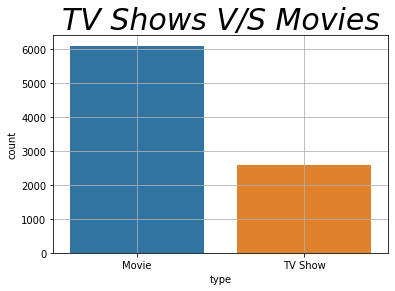

In [120]:
data = df1
data = data.drop_duplicates("title")

sns.countplot(data = data, x="type") # Dodget Bar Chart
plt.title("TV Shows V/S Movies" , fontsize = 30 , color='black',fontstyle = "italic")
plt.grid()
plt.show()

Number of movies produced by Netflix is more then Tv shows in the dataframe

In [121]:
#Renaming the listed_in column with Genre)
df1 = df1.rename(columns = { "listed_in" : "genre"})
df1.head()

,show_id,type,title,director,cast,genre,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,Michel Tikhomiroff,Ama Qamata,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,Crime TV Shows,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,United States
3,s5,TV Show,Kota Factory,BB Sasore,Mayur More,International TV Shows,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,India
4,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,TV Dramas,2021-09-24,2021,TV-MA,1 Season,The arrival of a charismatic young priest brin...,United States


2. List of all the genres present in netflix movies

In [122]:
movies_df["listed_in"].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas', 'Comedies',
       'Thrillers', 'Horror Movies', 'Action & Adventure',
       'International Movies', 'Sci-Fi & Fantasy', 'Classic Movies',
       'Stand-Up Comedy', 'Movies', 'Anime Features', 'Cult Movies',
       'Independent Movies', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'Sports Movies', 'Faith & Spirituality'],
      dtype=object)

In [123]:
print("Total no of genres present in dataframe : ", len(movies_df["listed_in"].unique()))

Total no of genres present in dataframe :  20


3. Most popular genre in movies 

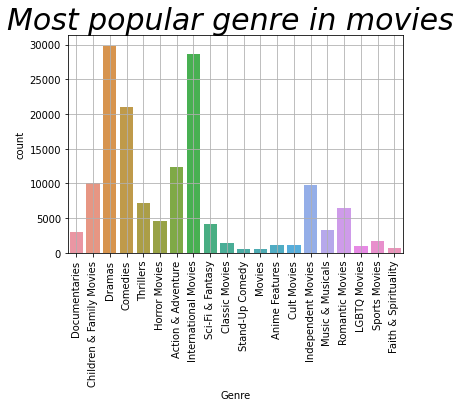

In [124]:
sns.countplot(data = movies_df, x='listed_in' ) 
plt.xlabel("Genre")
plt.title("Most popular genre in movies " , fontsize = 30 , color='black', fontstyle = "italic")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Dramas and International movies are most popular genres produced by netflix. The least ones being Faith and Spirituality, Stand-Up Comedy and movies according to the plot shown above

4. List of all the genres present in Netflix TV shows

In [150]:
shows_df["listed_in"].unique()

array(['International TV Shows', 'Crime TV Shows', 'TV Dramas',
       'British TV Shows', 'TV Comedies', 'Docuseries', "Kids' TV",
       'Reality TV', 'Anime Series', 'TV Shows', 'TV Action & Adventure',
       'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV',
       'Romantic TV Shows', 'TV Horror', 'Spanish-Language TV Shows',
       'TV Sci-Fi & Fantasy', 'Korean TV Shows', 'Science & Nature TV',
       'TV Mysteries', 'Teen TV Shows', 'TV Thrillers'], dtype=object)

In [126]:
print("Total no of genres present in dataframe : ", len(shows_df["listed_in"].unique()))

Total no of genres present in dataframe :  22


5. Most popular genre in Tv shows 

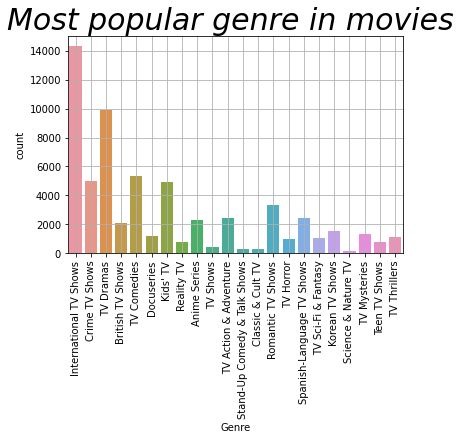

In [127]:
sns.countplot(data = shows_df, x='listed_in' ) 
plt.xlabel("Genre")
plt.title("Most popular genre in movies " , fontsize = 30 , color='black', fontstyle = "italic")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

International movies is most popular genres in TV Shows according to the plot shown above.
Lets concatinate the moves_df and shows_df dataframes for the further analysis

In [128]:
#concatinating movies and TV shows df into df1 and updating the other dataframes for further anaylsis
df2 = pd.concat([movies_df, shows_df], axis=0)
df2.reset_index(drop=True , inplace = True)
df2['duration'] = df2['duration'].astype(int)
df2 = df2.rename(columns = { "listed_in" : "genre"})
df1 = df2
df3 = df2
df2.head()

,show_id,type,title,director,cast,genre,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Craig Sechler,Documentaries,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States
1,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Children & Family Movies,2021-09-24,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,United States
2,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,Dramas,2021-09-24,1993,TV-MA,125,"On a photo shoot in Ghana, an American model s...",United States
3,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,Comedies,2021-09-24,2021,PG-13,104,A woman adjusting to life after a loss contend...,United States
4,s13,Movie,Je Suis Karl,Christian Schwochow,Luna Wedler,Dramas,2021-09-23,2021,TV-MA,127,After most of her family is murdered in a terr...,Germany


6. What type of content is available in different countries?

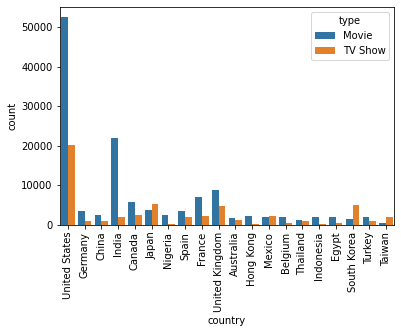

In [129]:
con = df1['country'].value_counts().head(20)
con = con.reset_index()
con['index']
data = df1[df1['country'].isin(con['index'])]

# Dodget Bar Chart
sns.countplot(data = data, x="country", hue="type") 
plt.xticks(rotation = 90)
plt.show()

As per the above plot there is huge difference seen in number of movies and TV shows in US and India. Hence we can say that viewers prefer movies over Tv shows in US and India. But its the reverse in case of South Korea, Taiwan, Japan. 

7. Most watched genre in movies in USA and India

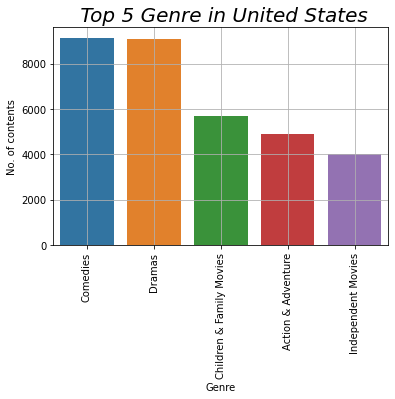

In [130]:
# Most watched genre in USA
gen_usa = df1[ (df1["country"]=="United States")]
gen = gen_usa['genre'].value_counts().head(5)
gen = gen.reset_index()
gen.rename(columns={"index":"Genre" , "genre":"No. of contents"} , inplace = True)
gen

sns.barplot(data = gen, x="Genre", y ="No. of contents"  ) 
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 5 Genre in United States" , fontsize = 20 , color = "black", fontstyle= "italic" )
plt.show()

US viewrs prefer to watch Comdies and Dramas over other genres in movies

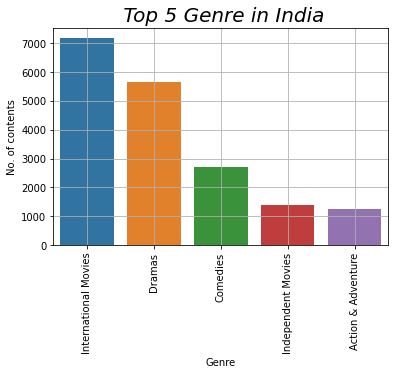

In [131]:
# Most watched genre in INDIA
ind_df = df1[ (df1["country"]=="India")]
ind = ind_df['genre'].value_counts().head(5)
ind = ind.reset_index()
ind.rename(columns={"index":"Genre" , "genre":"No. of contents"} , inplace = True)
ind

sns.barplot(data = ind, x="Genre", y ="No. of contents"  )  # Boxplot
plt.xticks(rotation = 90)
plt.grid()
plt.title(" Top 5 Genre in India" , color = "black", fontstyle= "italic"  , fontsize = 20)
plt.show()

Indian viewrs prefer to watch International Movies and Dramas over other genres in movies

8. How has the number of movies released per year changed over the last 20-30 years?

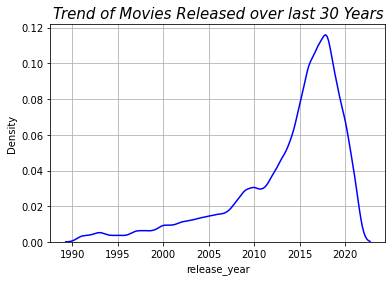

In [132]:
yyy = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "Movie")  ]
yyy

# Kernel Density Estimation(KDE) 
sns.kdeplot(data=yyy, x="release_year" , color = "blue") 
plt.grid()
plt.title('Trend of Movies Released over last 30 Years' ,color = "black" ,fontsize = 15 , fontstyle = "italic")
plt.show()

There is boost in number of movies released from 1990 to 2018 over last 30 years but the sudden fall in movies released may be due to covid situation worldwide.

9.  Total content across the years for movies and TV Shows

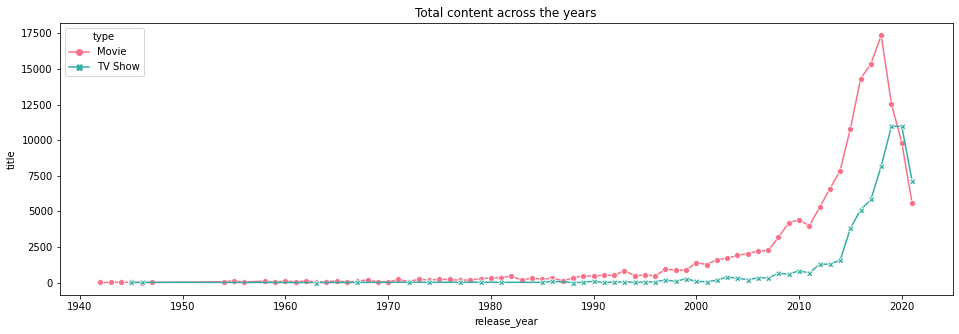

In [133]:
type_year = (df1.groupby(['type','release_year'])['title'].size()).reset_index()

fig = plt.figure(figsize=(16,5))
 #Plot Properties (data use type_year from data.groupby type and yearadd)
sns.lineplot(data = type_year,x = 'release_year',y = 'title',hue = 'type',style = 'type',palette="husl",markers=True, dashes=False)
plt.title("Total content across the years")
plt.show()

By this Visualization we will see Performance of Movies and TV Shows in due course of year. We will see between 2008 to 2014 Movie and TV Show almost have the same Growth Rate . Then after 2014 look like Movie have much more better Growth Rate than TV Series ,Of course TV Show have better Growth Rate too compare to the previous years , but still not match by far to Movies

10. How has the number of TV Shows released per year changed over the last 20-30 years?

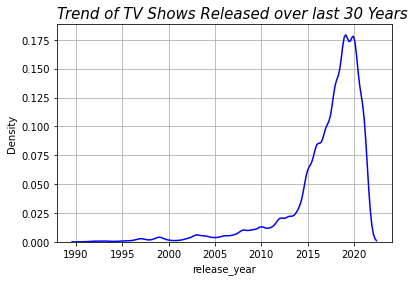

In [134]:
xxx = df2[ (df2['release_year'] > 1990)   &  (df2['type'] == "TV Show")  ]

sns.kdeplot(data=xxx, x="release_year" , color = "blue") # Kernel Density Estimation(KDE) shows the trend
plt.grid()
plt.title('Trend of TV Shows Released over last 30 Years',  fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black' )
plt.show()

11. Which year has the most movies/ tv shows added in Netflix

In [136]:
data1 = df2.drop_duplicates(['title',"director"])
data1["release_year"].value_counts()

2018    1290
2017    1139
2019    1138
2020    1070
2016    1013
        ... 
1942       2
1947       2
1966       1
1959       1
1961       1
Name: release_year, Length: 73, dtype: int64

2018 has more number of movies/tv shows added into Netflix

12.  What is the best time to launch a TV show or movies?

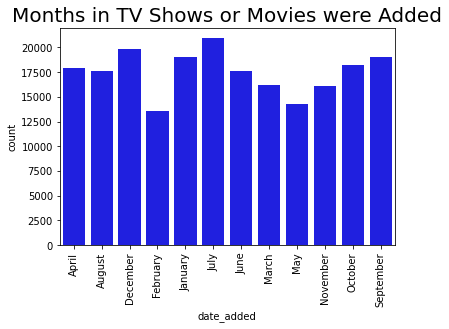

In [137]:
data = df1["date_added"].dt.strftime('%B').sort_values()
data = data.reset_index()

sns.countplot(data = data, x="date_added" ,color='blue')
plt.title("Months in TV Shows or Movies were Added" , fontsize = 20 , color='black')
plt.xticks(rotation = 90)
plt.show()

July month has maximun content released followed by december and september.

13. Top 5 directors in movies and Tv shows

In [138]:
movies = movies_df.drop_duplicates(['title',"director"])
countm = movies['director'].value_counts().head(5)

print("The top 5 directors in movies are :"  , countm)

the top 5 directors in movies are : Jan Suter         31
Raúl Campos       29
Marcus Raboy      22
Rajiv Chilaka     22
Richard Bailey    18
Name: director, dtype: int64


In [139]:
tv = shows_df.drop_duplicates(['title',"director"])
counttv = tv['director'].value_counts().head(5)

print("The top 5 directors in Tv shows are :"  , counttv)

the top 5 directors in Tv shows are : Jay Oliva           659
Tony Collingwood    198
Mat King            101
Ehtesham Uddin       89
Michael Simon        87
Name: director, dtype: int64


14. Top 5 Actors who worked in maximum number of movies & TV Show.

In [140]:
movies = movies_df.drop_duplicates(['title',"director"])
movieac = movies['cast'].value_counts().head(5)

print("Most worked Actors in movies are :"  , movieac)

Most worked Actors in movies are : Craig Sechler       172
El Negro Álvarez     92
Ben Ferencz          41
Allen Iverson        26
Shah Rukh Khan       26
Name: cast, dtype: int64


In [141]:
tv = shows_df.drop_duplicates(['title',"director"])
counttvac = tv['cast'].value_counts().head(5)

print("Most worked Actors in TV Shows are :"  , counttvac)

Most worked Actors in TV Shows are : Morgan Freeman        38
R. Kelly              36
David Attenborough    29
Marie Kondo           21
Chris Bourke          21
Name: cast, dtype: int64


15. Analysis on ratings of movies and TV Shows

In [142]:
# Finding the unique ratings given by people
df2["rating"].unique()

array(['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G',
       'TV-Y7', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [143]:
movies = movies_df.drop_duplicates(['title',"director"]) # for movies
movies["rating"].value_counts()


TV-MA       2350
TV-14       1548
R            861
TV-PG        603
PG-13        524
PG           338
TV-Y7        174
TV-Y         171
TV-G         144
NR            84
G             52
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

In [144]:
showsrat = shows_df.drop_duplicates(['title',"director"]) # for Tv shows
showsrat["rating"].value_counts()

TV-MA       1328
TV-14        803
TV-PG        331
TV-Y7        193
TV-Y         183
TV-G         115
R              8
NR             5
TV-Y7-FV       1
Name: rating, dtype: int64

Majority of TV Shows and Movies have got TV-MA ratings by viewers.  

16.  Seasons of TV shows

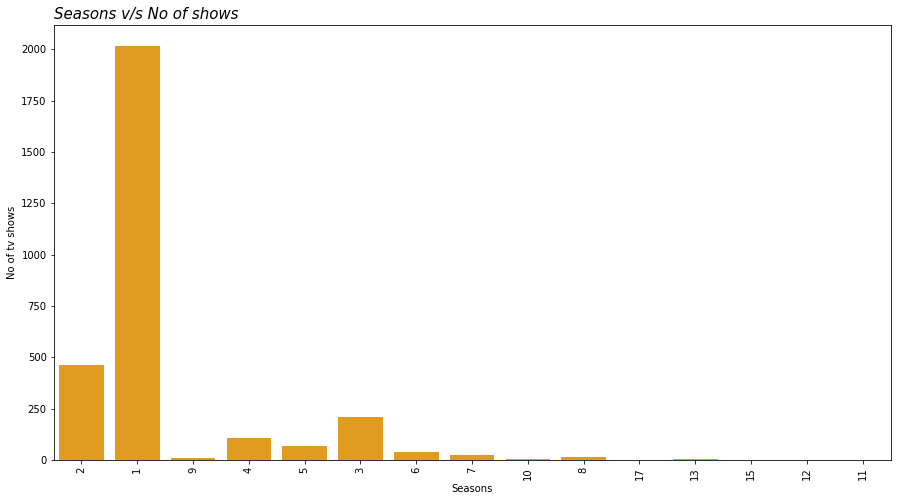

In [145]:
plt.figure(figsize=(15,8))
sns.countplot(data = tv , x = "duration",color = 'orange')
plt.title("Seasons v/s No of shows",  fontsize = 15 ,  loc="left",
          fontstyle='italic', color= 'black' )
plt.xlabel("Seasons")
plt.ylabel("No of tv shows")
plt.xticks(rotation = 90)
plt.show()

We can see that there are 1719 TV shows with only 1 season and 420 with 2 seasons each.There are shows having 13,15 or 17 seasons.

We can infer that more the season , most liked or popular show it is.



17. Does Netflix has more focus on TV Shows than movies in recent years

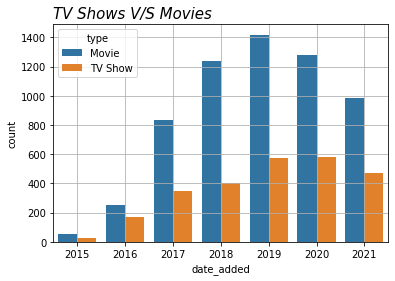

In [146]:
data = df1[ (df1['date_added'].dt.year > 2014) ]
data['date_added'] = data['date_added'].dt.year
data = data.drop_duplicates("title")
sns.countplot(data = data, x='date_added' , hue="type") 
plt.title("TV Shows V/S Movies" , fontsize = 15 ,  loc="left",
          fontstyle='italic' , color="black")
plt.grid()
plt.show()

Over the years netflix has definetly focused more on Movies then TV Shows.

We  can see the trend being same for Movies and TV Shows from 2015 to 2021. 

 2019 has the highest number of Movies and there is sudden drop in number of movies in 2020, the reason may be COVID suitation over the world.

18. Top 10 popular TV Shows and their seasons

In [147]:
tv = df1[df1['type'] == "TV Show"]
tv = tv.drop_duplicates(['title'])
# tv = tv[['title','duration']]
tv[['title','duration', 'director', 'genre']].sort_values(by = 'duration' , ascending = False).head(10).reset_index(drop = True)

,title,duration,director,genre
0,Grey's Anatomy,17,Jay Oliva,Romantic TV Shows
1,Supernatural,15,Phil Sgriccia,Classic & Cult TV
2,NCIS,15,Rob Seidenglanz,Crime TV Shows
3,Heartland,13,Daniel Minahan,TV Dramas
4,COMEDIANS of the world,13,Stan Lathan,Stand-Up Comedy & Talk Shows
5,Red vs. Blue,13,Jay Oliva,TV Action & Adventure
6,Criminal Minds,12,Rob Seidenglanz,Crime TV Shows
7,Trailer Park Boys,12,Jay Oliva,Classic & Cult TV
8,Cheers,11,Jay Oliva,Classic & Cult TV
9,Frasier,11,Jay Oliva,Classic & Cult TV


The GREY'S ANATOMY series having 17 seasons is the most romantic popular TV show directed by Jay Oliva .



# ***Relationship between date_added and release_year using pair plot***

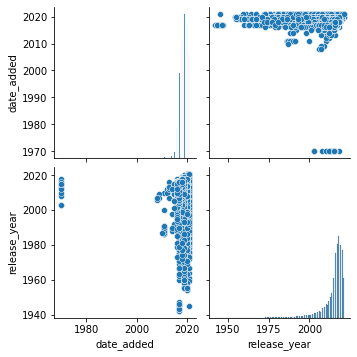

In [148]:
data = df1[["date_added","release_year",'title']]
data = data.drop_duplicates('title')
data = data[["date_added","release_year"]]
data["date_added"] = data["date_added"].dt.year
data["date_added"] = data["date_added"].astype(int)
sns.pairplot(data[["date_added","release_year"]])
plt.show()

In [149]:
# Corelation of whole data
data.info()
import plotly.figure_factory as ff

corrs = data.corr()
fig_heatmap = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
fig_heatmap.update_layout(title= 'Correlation of whole Data',  
                          plot_bgcolor= '#a5a7ab', paper_bgcolor='#2d3035',
                          title_font=dict(size=25, color='#8a8d93', family="Muli, sans-serif"),
                          font=dict(color='#2d3035'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704 entries, 0 to 150880
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date_added    8704 non-null   int64
 1   release_year  8704 non-null   int64
dtypes: int64(2)
memory usage: 204.0 KB


# ***Business Insights***

1. There are 6131 movies and 2676 TV Shows in the netflix dataframe. Hence no of movies are prefered way more then TV Shows.


2. There are around 20 genres present in the data, in which drama and international movies are the highest and popular among the users.


3. The least liked genre among the users are Faith and Spirituality, Stand-Up Comedy content on Netflix


4. We can say that viewers prefer movies over Tv shows in US and India. But its the reverse in case of South Korea, Taiwan, Japan.
   The South Asian countries prefer more TV shows and should be produced in order to engage the customer.


5. Top 2 genre among movies in USA - 'Comedies and Dramas' are top 2 popular in USA


6. Top 2 genre among TV Shows in USA : 'TV Dramas and TV Comedies'


7. Top 2 genre among movies in India :'International Movies and Dramas'


8. Top 2 genre among TV shows in India :'International TV Shows and TV Dramas'


9. There is boot in number of movies released from 1990 to 2018 over last 30      years.The sudden fall in movies may be because of covid situation worldwide.
   Its the same trend for TV Shows as well.


10. There are 1290 movies/TV Shows added in 2018 year on Netflix.


11. Top 2 months for adding higher number of movies or TV shows: 'July and December'


12. Jan Suter is the top director , who hav directed 31 movies on Netflix. He is well known for his Stand-Up Comedy with TV-MA, TV-14 rating


13. Jay Oliva is the most popular director among the top 10 TV shows in genres like classic and Cult TV Shows.


14. Top 5 movie directors having the range from 87-659 for maximum number of tv shows where they worked for.


15. Actor : Craig Sechler have worked in 172 movies followed by El Negro Álvarez and Ben Ferencz 


16. Most worked Actor in TV Shows is Morgan Freeman followed by R. Kelly and David Attenborough 


17. Majority of TV Shows and Movies have got TV-MA ratings by viewers.


18. The GREY'S ANATOMY series having 17 seasons is the most romantic popular TV show directed by Jay Oliva.


19. Top 2nd Show with 15 seasons is very popular show from United States & Cananda and has Rating:TV-14.
    This TV show falls in Classic & Cult TV, TV Action & Adventure and this show is directed by
    Phil Sgriccia 


20. Rajiv Chilaka is an Indian director who has made around 22 movies in Children & Family Movies and Sports Movies genre.


21. Indian actors like Sharukh khan and Anupam Kher are listed under most promising actors

# ***Recommendations***

1. Users are more interested in Dramas, International movies ,Comedies irrespective of country therefore more such content will benefit Netflix in long run.

2. From most popular genre we can see that viewers concentrate on entertainment factor then science or social related content. Hence releasing more of Comedies, Romantic, International shows can help in increase no of viewers.

3. Most of viewers are youth therefore this platform can help society in getting social change by investing on content related to daily-life crisis, LGBTQ, Poverty,etc

4. Festivals and Holidays are the best time to launch shows with respect to the location so that producer can gain much revenue. Keeping this in mind, User's engagement on platform can be increased and also help in getting new customers

5. Netflix needs to have different stratergy in terms of producing content for western countries and south asian countries

6. Drama is the most popular genre worldwide.So, Netflix can always rely on Drama type content for increasing market share and its growth in different  countries. 

7. If nextflix wants low budget and young talent then low experienced cast are the most suitable.

8. Following are the top 5 experienced directors in the field of movies: Jan Suter, Raúl Campos, Marcus Raboy, Rajiv Chilaka and Richard Bailey. So, while creating a new content these are the best directors to select in terms of experience and popularity.

9. TV-MA is highly rated content which means mature content is more.

10. There was slight drop in content due to Covid-19 but company was performing well as people had more time to spend watching shows during lockdown.

11. Netflix has made a remarkable market share in movies but there is a huge scope for TV shows as well.they are trending. Impact of South Asian culture , KPop has made Tv dramas trending..So Netflix can invest more on them.